In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np
from data import Dataloader
from models import TwoClustersMIP

# Loading the data
data_loader = Dataloader("../data/dataset_4") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

parameters = {"n_pieces": 5, "n_clusters": 2} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13620H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 6040 rows, 8048 columns and 63820 nonzeros
Model fingerprint: 0x7386e2d3
Variable types: 4048 continuous, 4000 integer (4000 binary)
Coefficient statistics:
  Matrix range     [1e-06, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 1.9998550
Presolve removed 2000 rows and 2000 columns
Presolve time: 0.04s
Presolved: 4040 rows, 6048 columns, 59820 nonzeros
Variable types: 4048 continuous, 2000 integer (2000 binary)

Root relaxation: objective 0.000000e+00, 2015 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\ipykernel\iostream.py", line 624, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


H 1566  1589                       0.1270585    0.00000   100%   175    5s
H 2798  2105                       0.0943049    0.00000   100%   159    7s
H 2800  1982                       0.0520407    0.00000   100%   159    8s
H 2800  1883                       0.0519739    0.00000   100%   159    8s
H 2800  1789                       0.0518482    0.00000   100%   159    9s
H 2801  1699                       0.0517814    0.00000   100%   159   10s
H 2801  1614                       0.0513555    0.00000   100%   159   10s
H 2801  1533                       0.0487412    0.00000   100%   159   12s
H 2802  1458                       0.0482486    0.00000   100%   159   12s
H 2802  1385                       0.0274714    0.00000   100%   159   13s
H 2807  1318                       0.0228547    0.00000   100%   159   14s
  2809  1323    0.00000   11  710    0.02285    0.00000   100%   168   15s


In [3]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

Percentage of explained preferences on train data: 1.0
Percentage of preferences well regrouped into clusters: 0.9930210105052526


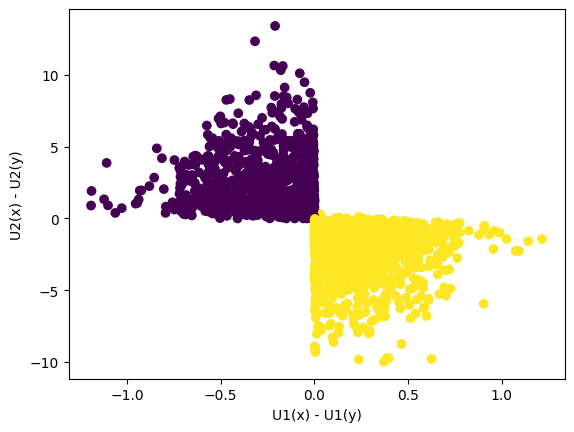

In [4]:

plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()

# from IPython.display import Image
# Image("../images/MIP_results_example.png")